In [9]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers, Sequential

In [6]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'yoga_data/train' ,
    labels='inferred' ,
    label_mode='int',
    batch_size=32 ,
    image_size=(256, 256),
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory = 'yoga_data/test' ,
    labels='inferred' ,
    label_mode='int',
    batch_size=32 ,
    image_size=(256, 256),
    shuffle=True    
)

Found 788 files belonging to 5 classes.
Found 200 files belonging to 5 classes.


In [7]:
train_ds.class_names

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

In [8]:
test_ds.class_names

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

####  labels='inferred' gives folder names as class labels & sorts them alphabetically 

## Visualizing if we have correct images with thier labels

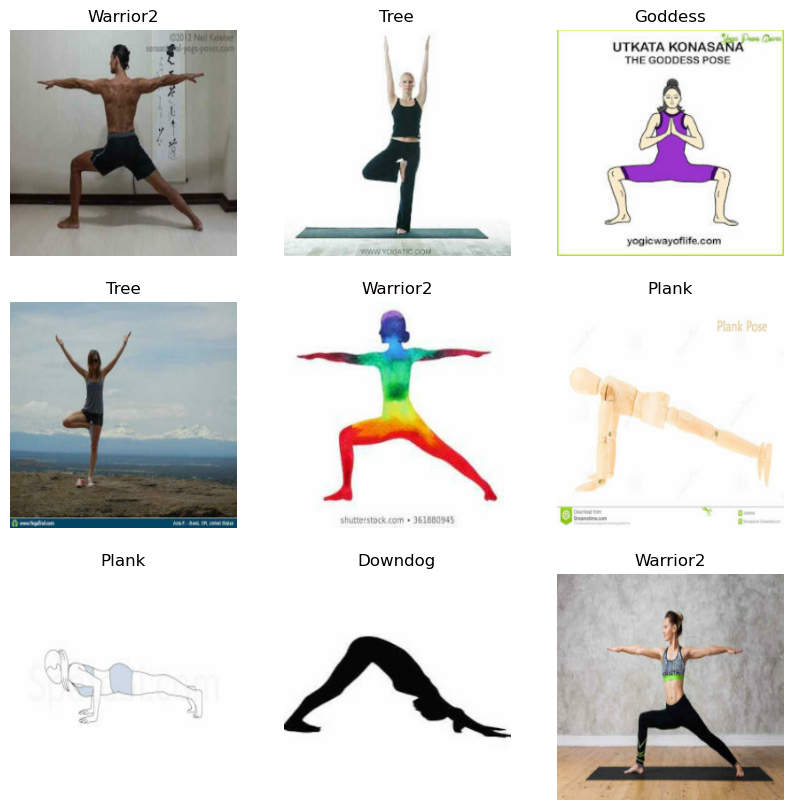

In [14]:
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [21]:
model = Sequential([
    layers.Input(shape=(256, 256, 3)),
    
    layers.Conv2D(
        filters=32,
        kernel_size=3,
        strides=(1, 1),
        padding='valid',
        activation='relu'
    ),

    layers.MaxPool2D(pool_size=(2, 2), padding='valid'),
     
    layers.Conv2D(
        filters=64,
        kernel_size=3,
        strides=(1, 1),
        padding='valid',
        activation='relu'
    ),

    layers.MaxPool2D(pool_size=(2, 2), padding='valid'),

    
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

    


In [22]:
model.compile( optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
model.fit( train_ds,
    batch_size=64,
    epochs=10,
    verbose='auto',)